#         Develpoment  and  Deployment  of  Predictive  Model  of  Employee                                                               Salary  Prediction

In [1]:
#Importing required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset
sal=pd.read_csv("C:\\Users\\91821\\Downloads\\Salary (1).csv")
sal.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
sal.shape

(35, 2)

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [5]:
sal.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [6]:
#Checking for null values
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

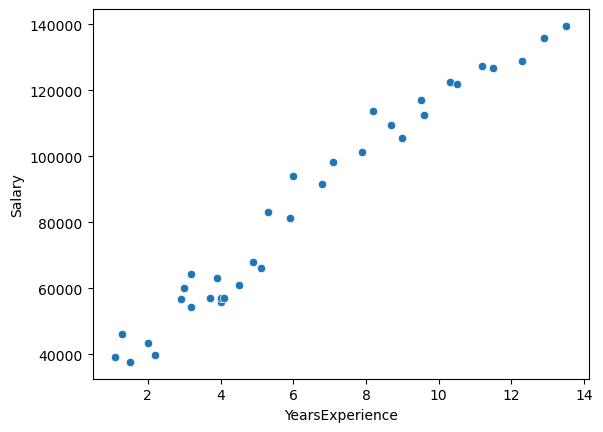

In [7]:
#Visualizing the Features and Labels
sns.scatterplot(data=sal,x="YearsExperience",y="Salary")

<AxesSubplot:>

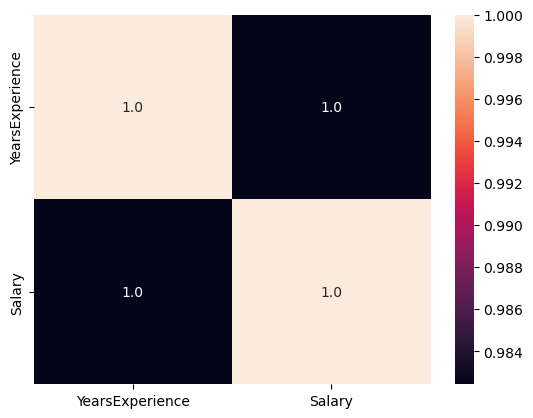

In [9]:
sns.heatmap(sal.corr(), annot=True, fmt="0.1f")

In [10]:
#Extracting Features(X) and Labels(Y) from Dataset
X=sal.iloc[:,:-1]
Y=sal.iloc[:,-1] 

In [11]:
X.head(2)

,YearsExperience
0,1.1
1,1.3


In [12]:
Y.head(2)

0    39343
1    46205
Name: Salary, dtype: int64

In [13]:
#Spliting the data into train and test set. Then do Feature Scaling
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.8,random_state=303)

In [14]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((28, 1), (7, 1), (28,), (7,))

In [15]:
#Training the model using suitable ML Models
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xtrain,ytrain)

LinearRegression()

In [16]:
yp=lr_model.predict(xtest)
yp

array([ 57453.2265425 , 142048.88605395,  39138.70231837,  42627.18312297,
       113268.91941604, 121118.00122638,  68790.78915744])

In [17]:
ytest

7      54445
33    135675
0      39343
2      37731
27    112635
29    121872
14     61111
Name: Salary, dtype: int64

In [18]:
#Checking the Accuracy of the model and performing Validation
lr_model.score(xtest,ytest)*100

98.7108371419573

In [19]:
new_data=[[5]]

lr_model.predict(new_data)

array([73151.39016318])

In [20]:
import pickle as pkl

filename="salary_model.sav"
pkl.dump(lr_model, open(filename, "wb"))